# WHITE WINE QUALITY PREDICTION

In [126]:
## Import Numpy, Pandas, Matplotlib, and seaborn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')


# Import KMeans library
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

# Import performance metrics
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix


In [127]:
## load my dataset
white_wine = pd.read_csv('winequality-white.csv')
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [128]:
white_wine.shape

(4898, 12)

In [129]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [130]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [131]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


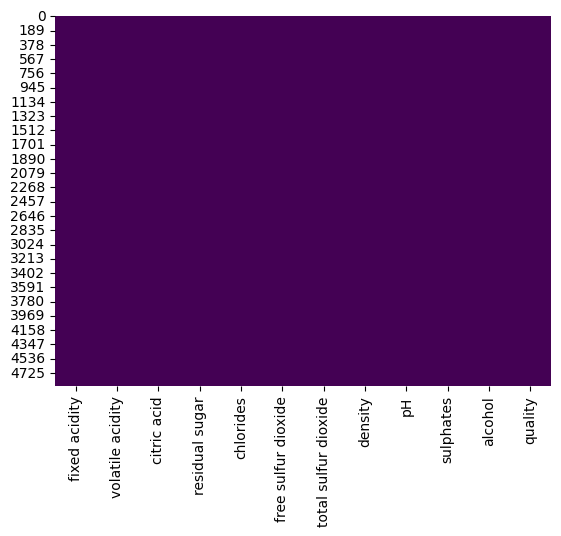

In [132]:
# # check for nulls
# df.isnull().sum()
sns.heatmap(white_wine.isna(), cbar=False, cmap='viridis')
plt.show()

In [133]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [134]:
white_wine['quality'].value_counts()
# There are 6 different quality rankings. Info may be useful for later

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

# Data preparation

In [135]:
# let's scale the data within a min of 1 and max of 10
scaled_data = (white_wine - white_wine.min()) / (white_wine.max() - white_wine.min()) *9 + 1
scaled_data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,3.643566,2.749186,2.811882,1.799428,1.982051,2.044504,3.701267,2.200239,4.831273,3.823979,4.649742,5.316864
std,0.730271,0.889364,0.656131,0.700131,0.583477,0.533325,0.887431,0.518954,1.235459,1.194340,1.786385,1.328458
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,3.163462,2.147059,2.463855,1.151840,1.721068,1.658537,3.067285,1.800318,4.027273,2.988372,3.177419,4.000000
50%,3.596154,2.588235,2.734940,1.634969,1.908012,2.003484,3.610209,2.150376,4.763636,3.616279,4.483871,5.500000
75%,4.028846,3.117647,3.114458,2.283742,2.094955,2.379791,4.299304,2.559861,5.581818,4.453488,5.935484,5.500000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [136]:
# check if my scaled_data is a Pandas or numpy
if hasattr(scaled_data, 'head'):
    print("It's a pandas DataFrame.")

# if hasattr(scaled_data, 'shape'):
#     print("It's a numpy array.")

It's a pandas DataFrame.


In [137]:
# There are no missing values
# All classes are either float or integer
# time to do some EDA

Definitions

In [138]:
""""
Fixed Acidity: The amount of non-volatile acids in the wine. It contributes to its overall acidity.

Volatile Acidity: The amount of volatile acids in the wine which can contribute to a sour or vinegary acidity.

Citric Acid: The amount of citric acid in the wine, which can add freshness and flavor.

Residual Sugar: The amount of sugar remaining after fermentation. Ita ffects the sweetness.
Chlorides: The amount of salt in the wine.

Free Sulfur Dioxide: The free form of SO2 that exists in equilibrium between molecular SO2 
(as a dissolved gas) and bisulfite ion.

Total Sulfur Dioxide: The amount of free and bound forms of sulfur dioxide.

Density: The density of the wine.

pH: The acidity or alkalinity level of the wine.

Sulphates: The amount of sulphates in the wine, which can contribute to SO2 gas dissolution 
and is known to affect wine aroma and flavor.

Alcohol: The alcohol content of the wine.

Quality: The target label, representing the quality of the wine 
(usually on a scale from 3 to 9 for white wines and 4 to 8 for red wines).
"""

'"\nFixed Acidity: The amount of non-volatile acids in the wine. It contributes to its overall acidity.\n\nVolatile Acidity: The amount of volatile acids in the wine which can contribute to a sour or vinegary acidity.\n\nCitric Acid: The amount of citric acid in the wine, which can add freshness and flavor.\n\nResidual Sugar: The amount of sugar remaining after fermentation. Ita ffects the sweetness.\nChlorides: The amount of salt in the wine.\n\nFree Sulfur Dioxide: The free form of SO2 that exists in equilibrium between molecular SO2 \n(as a dissolved gas) and bisulfite ion.\n\nTotal Sulfur Dioxide: The amount of free and bound forms of sulfur dioxide.\n\nDensity: The density of the wine.\n\npH: The acidity or alkalinity level of the wine.\n\nSulphates: The amount of sulphates in the wine, which can contribute to SO2 gas dissolution \nand is known to affect wine aroma and flavor.\n\nAlcohol: The alcohol content of the wine.\n\nQuality: The target label, representing the quality of th

# Visualization

In [139]:
# sns.pairplot(data=white_wine, hue='quality')
# plt.show()

Distribution charts

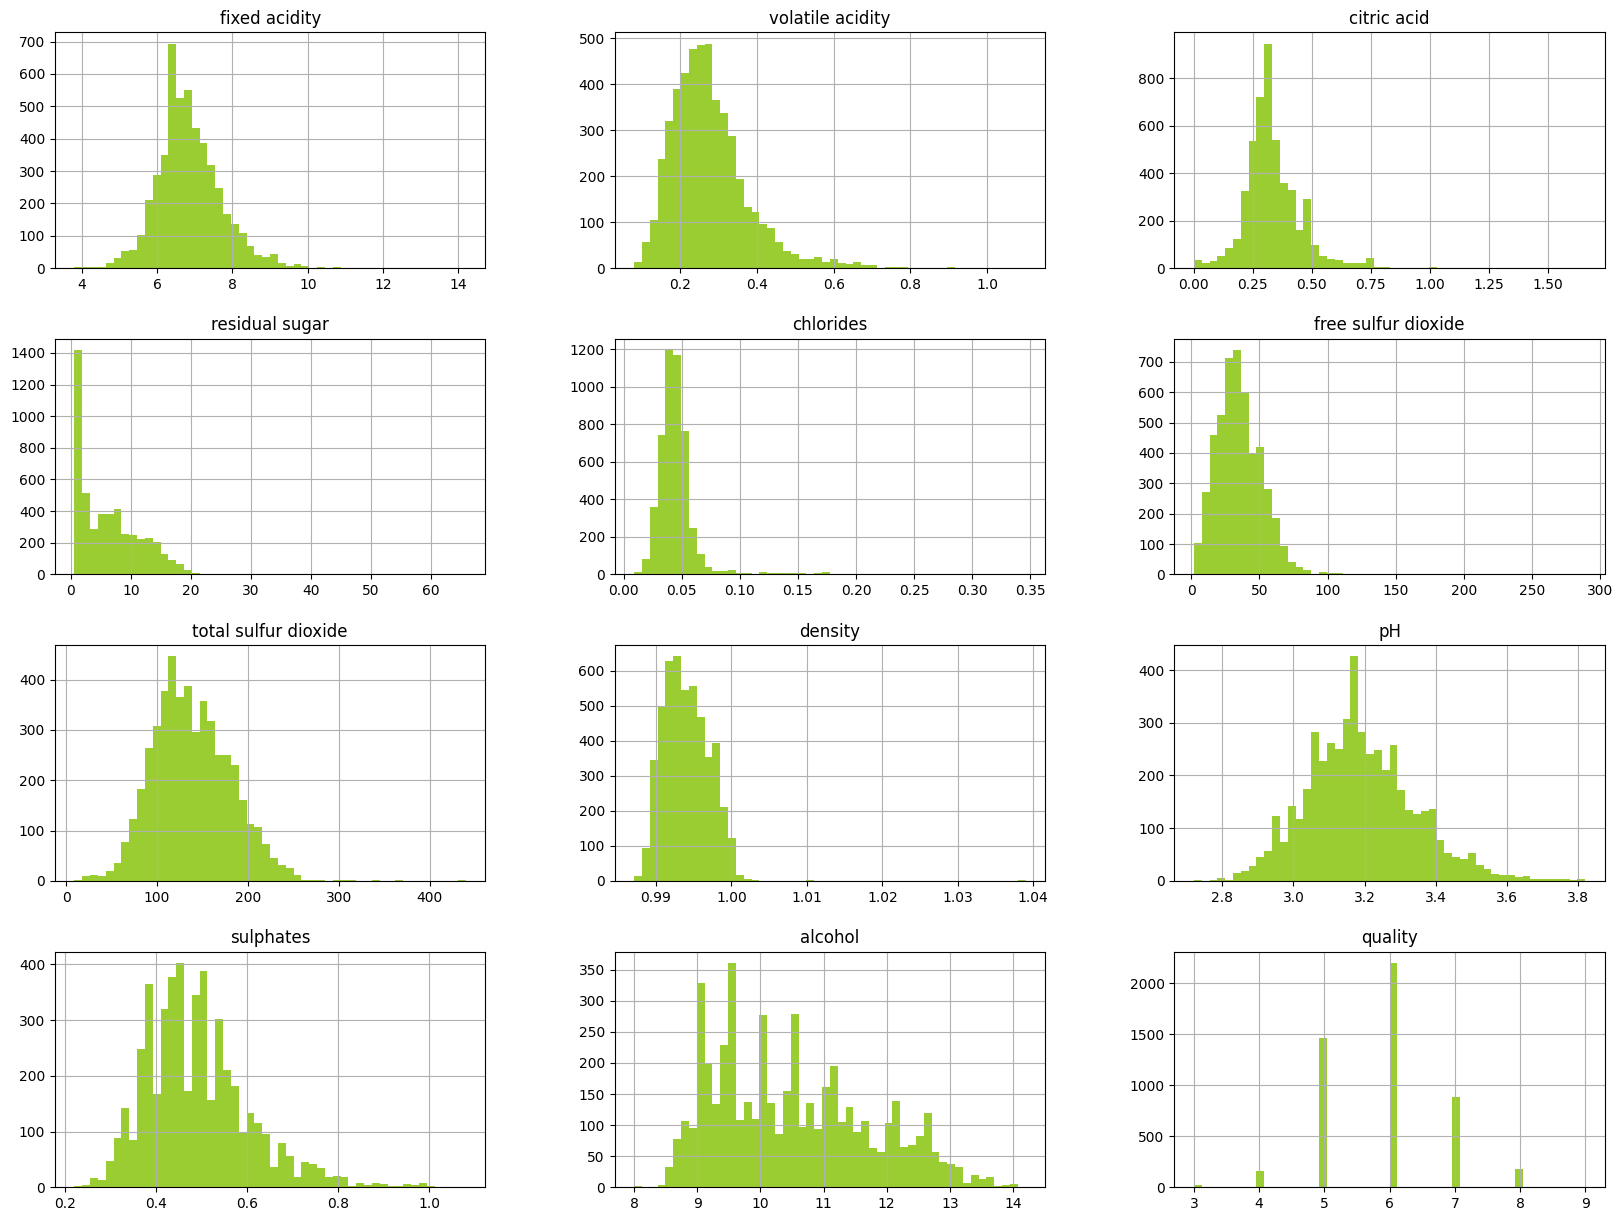

In [140]:
# Create histograms for the selected columns
white_wine.hist(bins=50, figsize=(20, 15), color = 'yellowgreen')
plt.show()

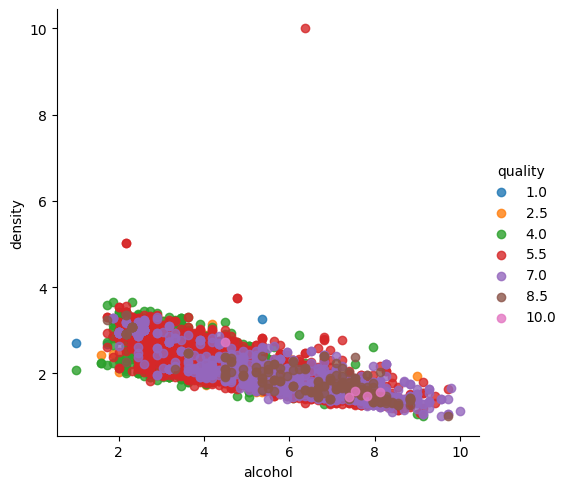

In [141]:
# Scatter plot between density and alcohol accounting for quality levels
sns.lmplot(x= 'alcohol', y= 'density', data = scaled_data, hue ='quality', fit_reg= False) 





































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































































Bar charts

In [142]:
"""
Bar Plots for Categorical Variables:
Create bar plots to visualize the distribution of categorical variables like 
'bruises,' 'gill-size,' 'gill-color,' 'stalk-shape,' 'stalk-root,' 'stalk-color-below-ring,
' 'spore-print-color,' 'population,' and 'habitat.'
 You can use these plots to see the frequency of each category within these columns.

Count Plots for Class Distribution:
Create count plots to visualize the distribution of the 'class' variable, 
which represents whether mushrooms are 'edible' or 'poisonous.' 
This can help you understand the class balance.

Box Plots for Numerical Variables:
For any numerical variables within your list,
 you can create box plots to visualize the distribution of data, including potential outliers.

Correlation Heatmap:
Create a correlation heatmap to understand the relationships between variables. 
This can be especially useful when dealing with numerical features like 'gill-size.'

Pairplot (as previously mentioned):
The pairplot allows you to visualize pairwise relationships between numerical features. 
You can also color the data points by 'class' to see how different classes are distributed.

Histograms:
For any numerical variables, create histograms to visualize their distributions.

Pie Charts:
For categorical variables, consider pie charts to visualize the proportions of different categories.

Violin Plots:
Violin plots can be used to show the distribution of a numerical variable 
across different categories in a more informative way compared to box plots.

Swarm Plots:
Swarm plots can be used to visualize the distribution of data points along a categorical axis.

Scatter Plots:
Create scatter plots to explore the relationships between numerical variables. 
This can be helpful when comparing 'spore-print-color' or 'population' with other features.

The choice of visualizations depends on the nature of the data and the specific questions 
you want to answer during your exploratory data analysis. You can use a combination 
of these charts to gain a comprehensive understanding of the dataset and identify patterns and insights.
"""

"\nBar Plots for Categorical Variables:\nCreate bar plots to visualize the distribution of categorical variables like \n'bruises,' 'gill-size,' 'gill-color,' 'stalk-shape,' 'stalk-root,' 'stalk-color-below-ring,\n' 'spore-print-color,' 'population,' and 'habitat.'\n You can use these plots to see the frequency of each category within these columns.\n\nCount Plots for Class Distribution:\nCreate count plots to visualize the distribution of the 'class' variable, \nwhich represents whether mushrooms are 'edible' or 'poisonous.' \nThis can help you understand the class balance.\n\nBox Plots for Numerical Variables:\nFor any numerical variables within your list,\n you can create box plots to visualize the distribution of data, including potential outliers.\n\nCorrelation Heatmap:\nCreate a correlation heatmap to understand the relationships between variables. \nThis can be especially useful when dealing with numerical features like 'gill-size.'\n\nPairplot (as previously mentioned):\nThe pa

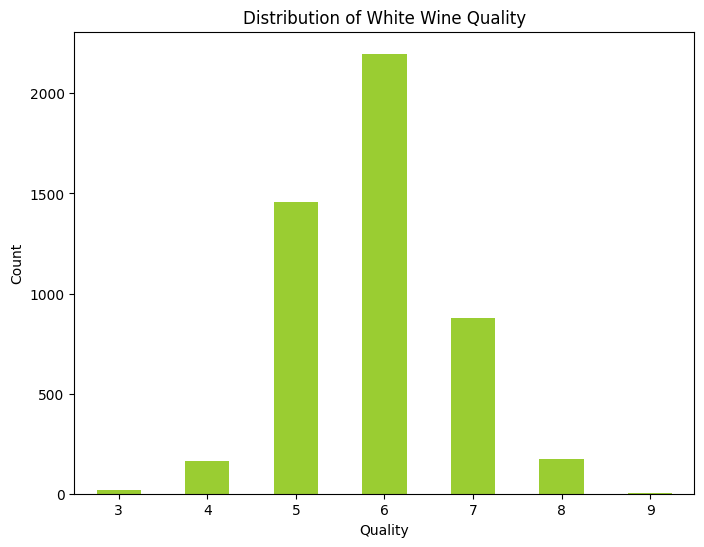

In [143]:
# Assuming 'white_wine' is my DataFrame
quality_counts = white_wine['quality'].value_counts().sort_index()

# Create the bar chart
plt.figure(figsize=(8, 6))
quality_counts.plot(kind='bar', color='yellowgreen')
plt.title('Distribution of White Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Avoid rotating the x-axis labels
plt.show()

Correlation Matrix

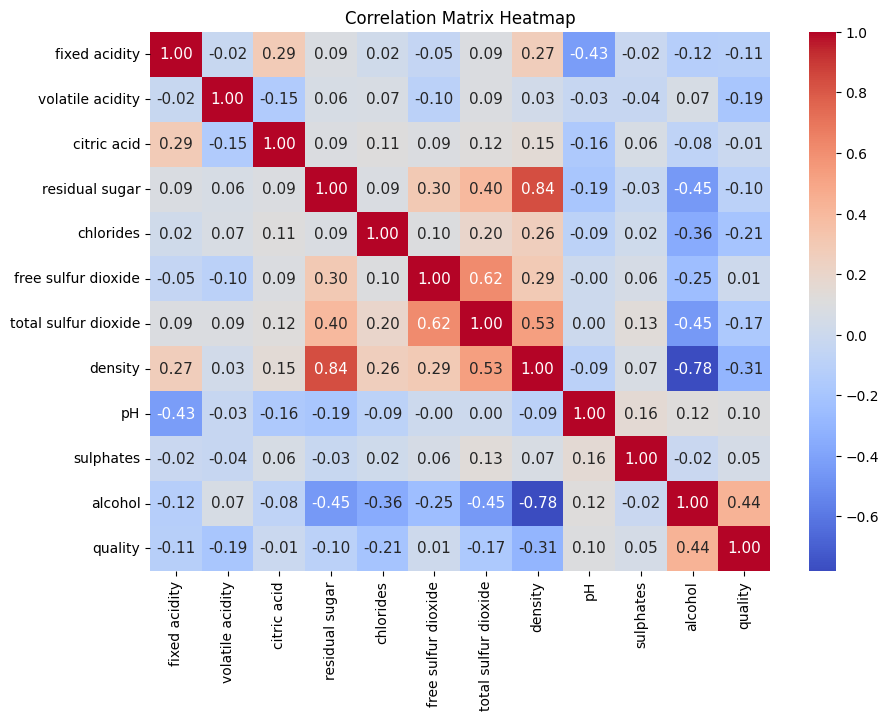

In [144]:
# correlation_matrix = selected_data.corr()
correlation_matrix = white_wine.corr()
# Create a correlation heatmap
plt.figure(figsize=(10, 7))
sns.heatmap(correlation_matrix, cmap='coolwarm', annot=True, fmt = ".2f", annot_kws={'size': 11})
plt.title("Correlation Matrix Heatmap", loc="center")
plt.show()

In [145]:
# correl vs target 
white_wine.corr()["quality"].sort_values()

density                -0.307123
chlorides              -0.209934
volatile acidity       -0.194723
total sulfur dioxide   -0.174737
fixed acidity          -0.113663
residual sugar         -0.097577
citric acid            -0.009209
free sulfur dioxide     0.008158
sulphates               0.053678
pH                      0.099427
alcohol                 0.435575
quality                 1.000000
Name: quality, dtype: float64

In [146]:
# # Alcohol and vol acidity have respectively the highest and lowest correlations vs. quality
# white_wine = white_wine.drop("quality", axis = 1)
# # white_wine.columns

# Model

Kmeans can find patterns in my data that i did not know were there

Find the number of clusters K: the elbow method

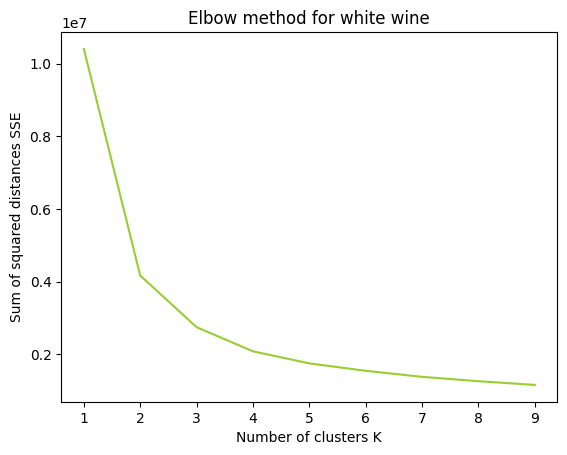

In [147]:
# To find the optimal number of clusters let's use the Elbow method 
elb_plot = []
for x in range(1,10):
    kmeans = KMeans(n_clusters = x, init = 'k-means++', random_state=42, n_init="auto")
    kmeans.fit(white_wine)
    elb_plot.append(kmeans.inertia_)

plt.plot(range(1,10), elb_plot, color = 'yellowgreen')
plt.title("Elbow method for white wine")

plt.xlabel("Number of clusters K")
plt.ylabel("Sum of squared distances SSE")
plt.show()

Fit KMeans Model

In [148]:
k = 3  # Set the number of clusters based on the elbow method 
kmeans = KMeans(n_clusters=k, random_state=0)
white_y_pred = kmeans.fit_predict(scaled_data)
# should i write white_wine['cluster'] instead of white_y_pred
white_y_pred

array([0, 2, 2, ..., 0, 1, 1])

In [149]:
white_wine['clusters'] = white_y_pred
white_wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,clusters
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6,2
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6,2
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,2
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


In [150]:
# let's look at the centroids
kmeans.cluster_centers_

array([[3.80635882, 2.87952226, 2.86381798, 2.1733449 , 2.20030637,
        2.19181217, 4.11387258, 2.57118405, 4.31401585, 3.63016137,
        3.19959303, 4.62128942],
       [3.61309157, 2.85111399, 2.78854094, 1.497412  , 1.72042602,
        1.878363  , 3.17101023, 1.72068602, 4.64257606, 3.45905765,
        6.77096128, 6.16533066],
       [3.39829703, 2.40092133, 2.75000726, 1.5150547 , 1.91867291,
        1.98917762, 3.6243312 , 2.13448194, 5.95391019, 4.59840291,
        4.6104314 , 5.50120482]])

In [151]:
# Assuming you have already performed clustering and assigned cluster labels to your data
clustered_data = white_wine

# Fit the KMeans model to get cluster centroids
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Perform PCA on the cluster centroids to reduce dimensionality to 2D
pca = PCA(n_components=2)
centroids_2d = pca.fit_transform(kmeans.cluster_centers_)

# Centroid coordinates in 2D are stored in the 'centroids_2d' variable
print("Cluster Centroid Coordinates in 2D:")
print(centroids_2d)


Cluster Centroid Coordinates in 2D:
[[-2.047048   -0.70584949]
 [ 2.16084028 -0.5999156 ]
 [-0.11379228  1.30576509]]


In [152]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principal_components = pca.fit_transform(scaled_data)
white_wine['PCA1'] = principal_components[:, 0]
white_wine['PCA2'] = principal_components[:, 1]

# PCA (principal component analysis helps visualize the data and potentially identify clusters more easily.
# Because I have a high dimensionality with over 9 features, the primary goal of PCA is 
# to reduce the dimensionality of my data while preserving as much of the variance as possible. 
# # The resulting 'PCA1' and 'PCA2' columns allow you to plot your data in a 2D space.
# It doesn't "compress" the data visually, but it helps you project your data onto a 2D plane
#  while retaining the most important information.

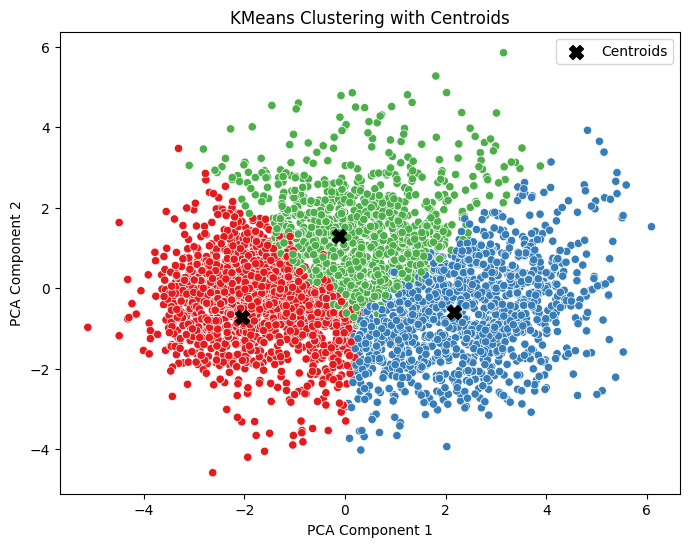

In [153]:
# Assuming you have already performed clustering and assigned cluster labels to your data
clustered_data = white_wine

# Fit the KMeans model to get cluster centroids
kmeans = KMeans(n_clusters=k, random_state=0)
kmeans.fit(scaled_data)

# Extract the cluster centroids
pca = PCA(n_components=2)
centroids = pca.fit_transform(kmeans.cluster_centers_)

# Plot the clusters and centroids in a 2D space using PCA components
plt.figure(figsize=(8, 6))
sns.scatterplot(x='PCA1', y='PCA2', hue='clusters', data=clustered_data, palette='Set1', legend=False)
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=100, marker='X', label='Centroids')
plt.title('KMeans Clustering with Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# The silhouette score measures how similar an object is to its own cluster (cohesion) compared 
# to other clusters (separation). 
# Silhouette Score near 1: This indicates that the object is well matched to its own cluster and poorly matched 
# to neighboring clusters. In other words, the clusters are well separated.
# Silhouette Score near 0: This indicates that the object is on or very close to the decision boundary between 
# two neighboring clusters. It could be in a situation where it's difficult to decide to which cluster it 
# belongs.
# Silhouette Score near -1: This indicates that the object is poorly matched to its own cluster and well matched
#  to a neighboring cluster. It suggests that the object may be assigned to the wrong cluster.
# # 


# Model evaluation

In [154]:
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

print('Within Cluster Sum of squares: ', kmeans.inertia_)

silhouette_avg = round(silhouette_score(scaled_data, white_wine['clusters']),3)
print("Silhouette Score:", silhouette_avg)

db_index = round(davies_bouldin_score(scaled_data, white_wine['clusters']),3)
print("Davies-Bouldin Index:", db_index)

inertia = round(kmeans.inertia_,3)
print("Within Cluster Sum of squares:", inertia)


Within Cluster Sum of squares:  38666.78026334543
Silhouette Score: 0.171
Davies-Bouldin Index: 1.866
Within Cluster Sum of squares: 38666.78


In [155]:
# Initialize an empty list to store metric dictionaries
metrics_list = []

# Fit KMeans for different values of k and calculate metrics for each cluster
for k in range(2, 8):
    kmeans = KMeans(n_clusters=k, random_state=0)
    clustered_data['cluster'] = kmeans.fit_predict(scaled_data)
    
    silhouette_avg = silhouette_score(scaled_data, clustered_data['cluster'])
    db_index = davies_bouldin_score(scaled_data, clustered_data['cluster'])
    inertia = kmeans.inertia_
    
    # Create a dictionary for the current cluster
    metric_dict = {'Cluster': k, 'Silhouette Score': silhouette_avg, 'Davies-Bouldin Index': db_index, 
                   'Inertia': inertia}
    
    # Append the metric dictionary to the list
    metrics_list.append(metric_dict)

# Create a DataFrame from the list of metric dictionaries
metrics_df = pd.DataFrame(metrics_list)

# Display the table of metrics
print(metrics_df)



   Cluster  Silhouette Score  Davies-Bouldin Index       Inertia
0        2          0.238379              1.574455  42743.597980
1        3          0.170760              1.866110  38666.780263
2        4          0.155787              1.812091  35602.521737
3        5          0.135569              1.932607  33607.358471
4        6          0.134310              1.852676  31892.981497
5        7          0.125004              1.937468  30628.093734


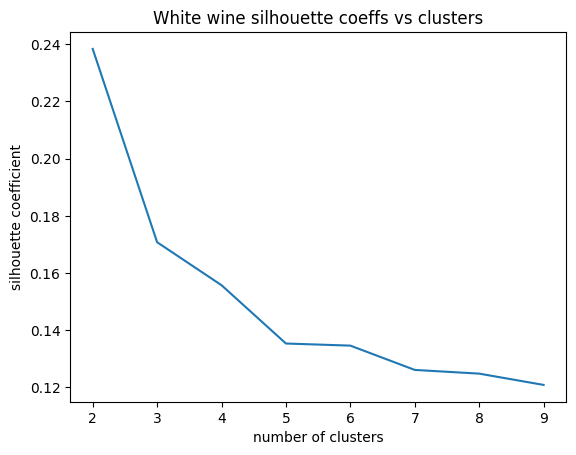

In [156]:
silhouette_coefficients = []
for x in range(2,10):
    kmeans = KMeans(n_clusters= x, max_iter= 100)
    kmeans.fit(scaled_data)
    score = silhouette_score(scaled_data, kmeans.labels_)
    silhouette_coefficients.append(score)

plt.plot(range(2,10), silhouette_coefficients)
plt.xticks(range(2,10))
plt.title('White wine silhouette coeffs vs clusters')
plt.xlabel("number of clusters")
plt.ylabel("silhouette coefficient")
plt.show()

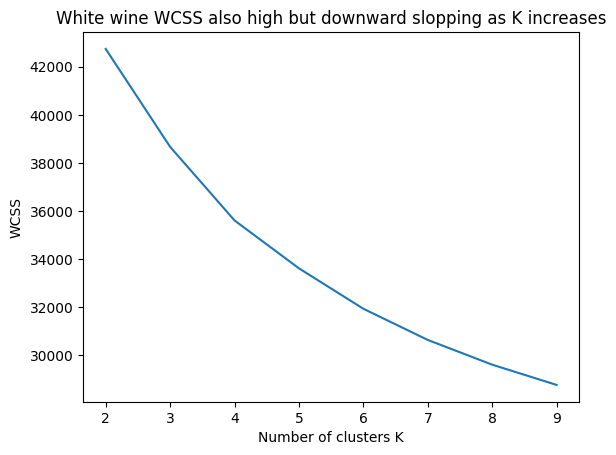

In [157]:
wcss = []

for x in range(2, 10):
    kmeans = KMeans(n_clusters=x, max_iter=100)
    kmeans.fit(scaled_data)
    
    # Calculate the WCSS for this number of clusters
    wcss.append(kmeans.inertia_)  # Use 'inertia_' to get WCSS

plt.plot(range(2, 10), wcss)
plt.xticks(range(2, 10))
plt.xlabel("Number of clusters K")
plt.ylabel("WCSS")
plt.title("White wine WCSS also high but downward slopping as K increases")
plt.show()


# Let's try a logistic regression to double check robustness of model

In [158]:
# This could be a regression exercice as well since we have labelled data
X = white_wine.drop('quality', axis = 1)
y = white_wine['quality']

# Split data
X_train, X_test, y_train, y_test = train_test_split( X,y, test_size = 0.2, random_state= 32)

Scaler_X = MinMaxScaler()
X_train = Scaler_X.fit_transform(X_train) # scaling training set
X_test = Scaler_X.fit_transform(X_test) # scaling test set

# Create a logistic regression model
logr_model = LogisticRegression(random_state=0, max_iter=1000)
# Train the model
logr_model.fit(X_train, y_train)
# Make prediction using the test dataset on Logistic Classifier model

LogisticRegression(max_iter=1000, random_state=0)

In [159]:

# Make predictions on the test data
logr_y_pred = logr_model.predict(X_test)

# Calculate and print the model's accuracy score
accuracy = round(accuracy_score(y_test, logr_y_pred),4)
print("Logistic Regression Accuracy:", accuracy)
print()

# Print the model's classification report
print(classification_report(y_test,logr_y_pred))

Logistic Regression Accuracy: 0.5918

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.21      0.09      0.13        33
           5       0.64      0.19      0.30       284
           6       0.59      0.83      0.69       444
           7       0.60      0.85      0.70       181
           8       0.00      0.00      0.00        31

    accuracy                           0.59       980
   macro avg       0.34      0.33      0.30       980
weighted avg       0.57      0.59      0.53       980

